# Silhouette Score

- silhouette refers to a method of imterpredation and validation of consistency within clusters of data
- Silhouette coeficient or silhouette score is a metrix used to calculate the goodnedd of a clustering techniquw.
- Its value ranges from -1 to 1.
- The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters.

It tells you:
- How close a point is to its own cluster
- How far away it is from other clusters

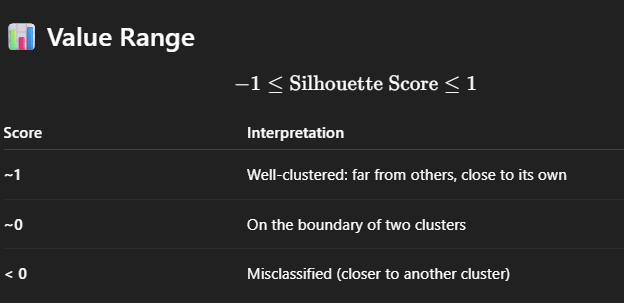

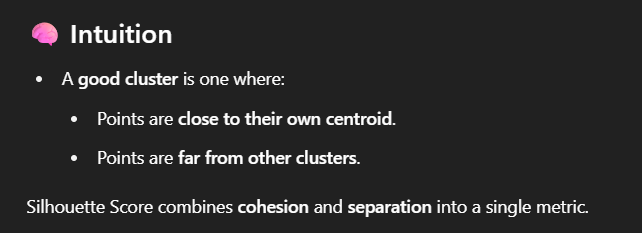

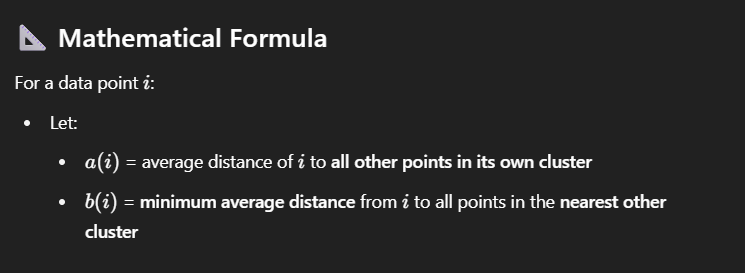

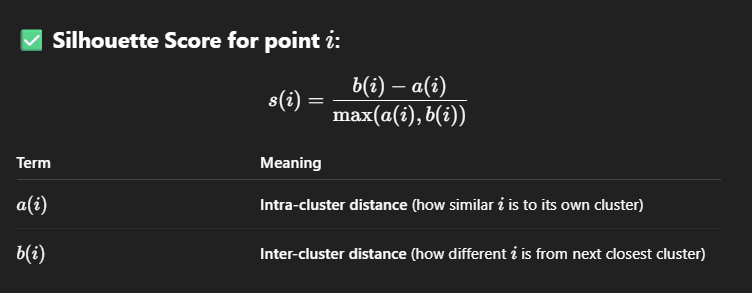
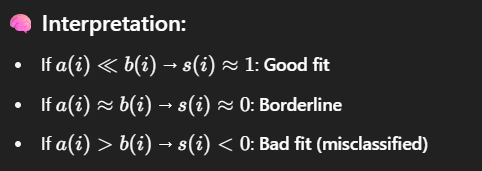
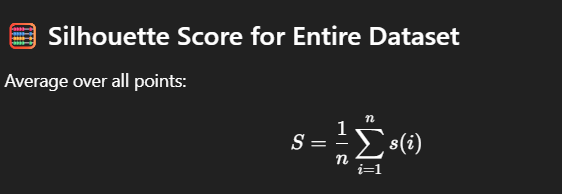

Formula

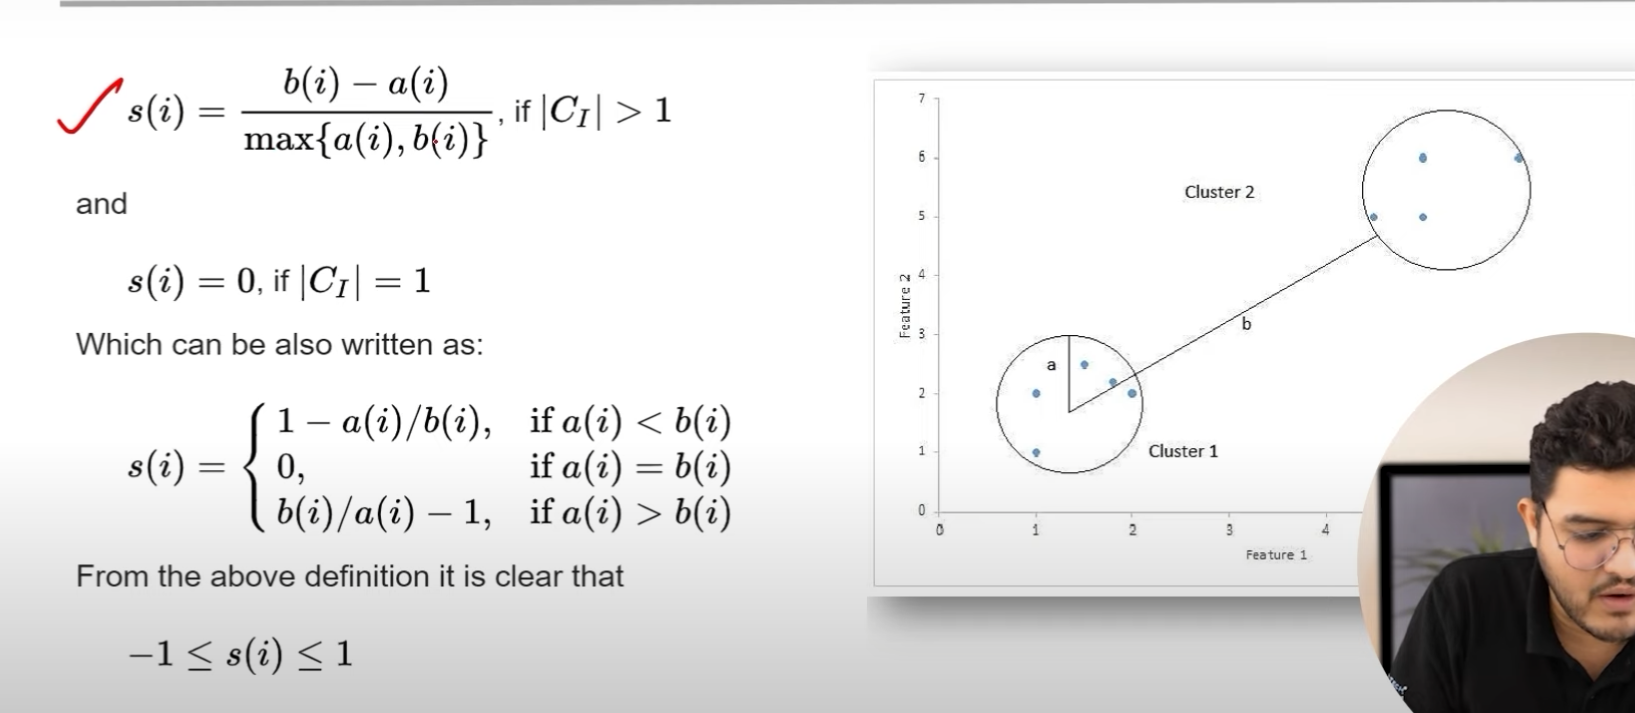
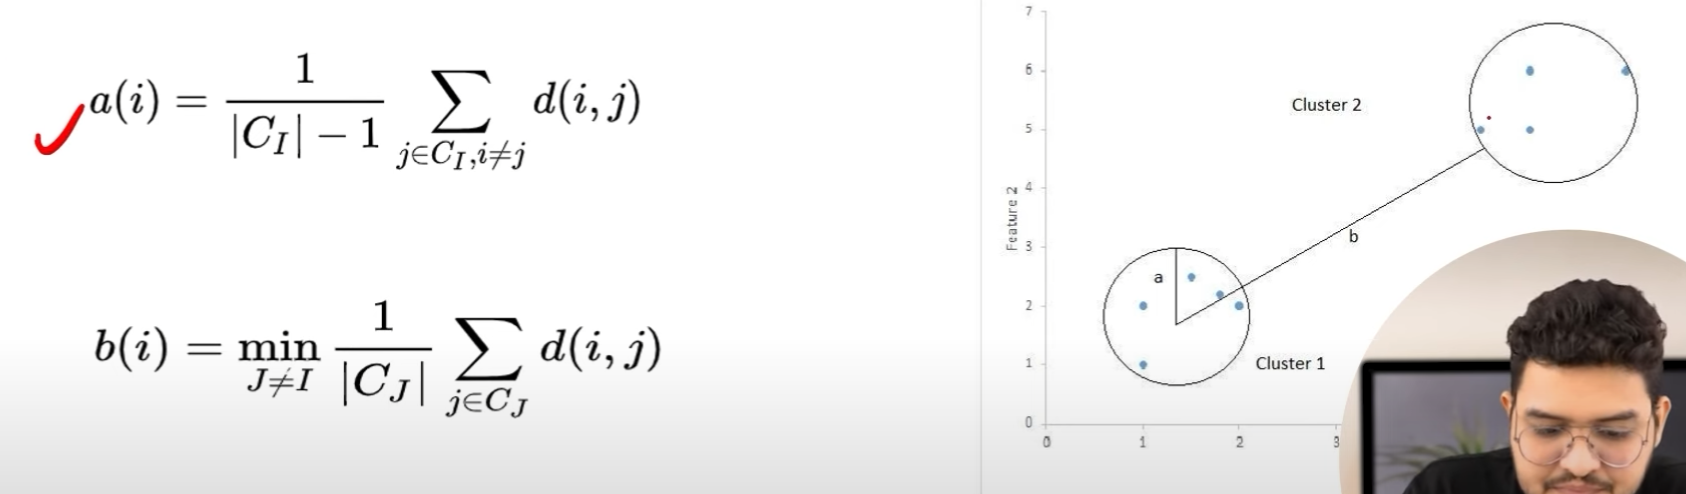

---

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Create synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

# Calculate silhouette score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.6819938690643478


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ds = pd.read_csv('iris-dataset.csv')
ds.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


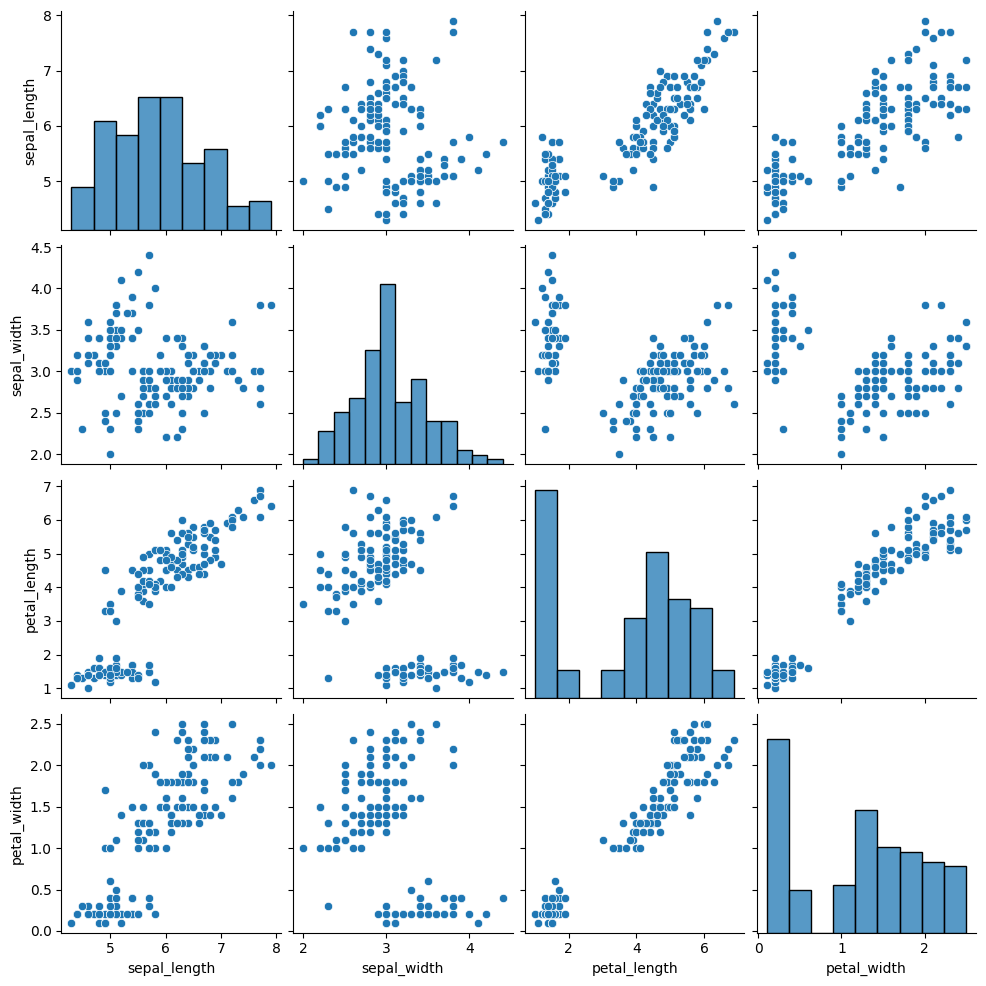

In [5]:
sns.pairplot(data= ds)
plt.show()

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
wcss = []

for i in range(2, 21):
    km = KMeans(n_clusters= i, init= 'k-means++')
    km.fit(ds)
    wcss.append(km.inertia_)

In [8]:
wcss

[152.36870647733906,
 78.9450658259773,
 57.345409315718165,
 49.98095785599265,
 42.884945122396786,
 40.53706666666667,
 29.88140221051091,
 28.405748065659832,
 26.528822665056364,
 24.71778253609136,
 23.41898737227685,
 21.550899195575663,
 20.692447748330107,
 19.652287878787877,
 18.928955086580086,
 17.40679273830745,
 16.31299801587302,
 15.124457431457433,
 16.057524642024642]

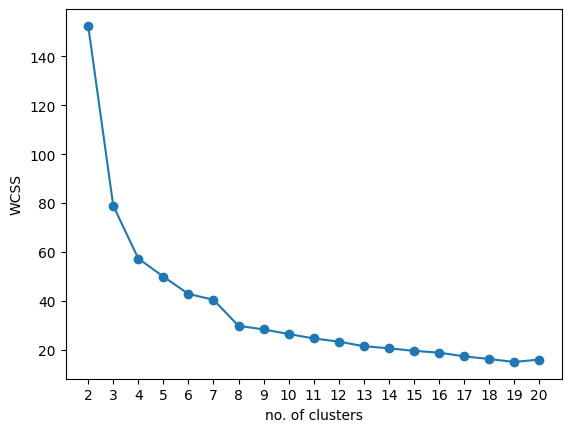

In [9]:
plt.plot([i for i in range(2, 21)], wcss, marker= "o")
plt.xlabel('no. of clusters')
plt.xticks([i for i in range(2, 21)])
plt.ylabel('WCSS')
plt.show()  # here we can see the best no of cluster is 3 as after that its going down

In [10]:
kmn = KMeans(n_clusters=3)
kmn.fit_predict(ds)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [14]:
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [16]:
silhouette_score(ds, labels= kmn.labels_)*100

np.float64(68.44657470953514)

In [11]:
ds['predict'] = kmn.fit_predict(ds)

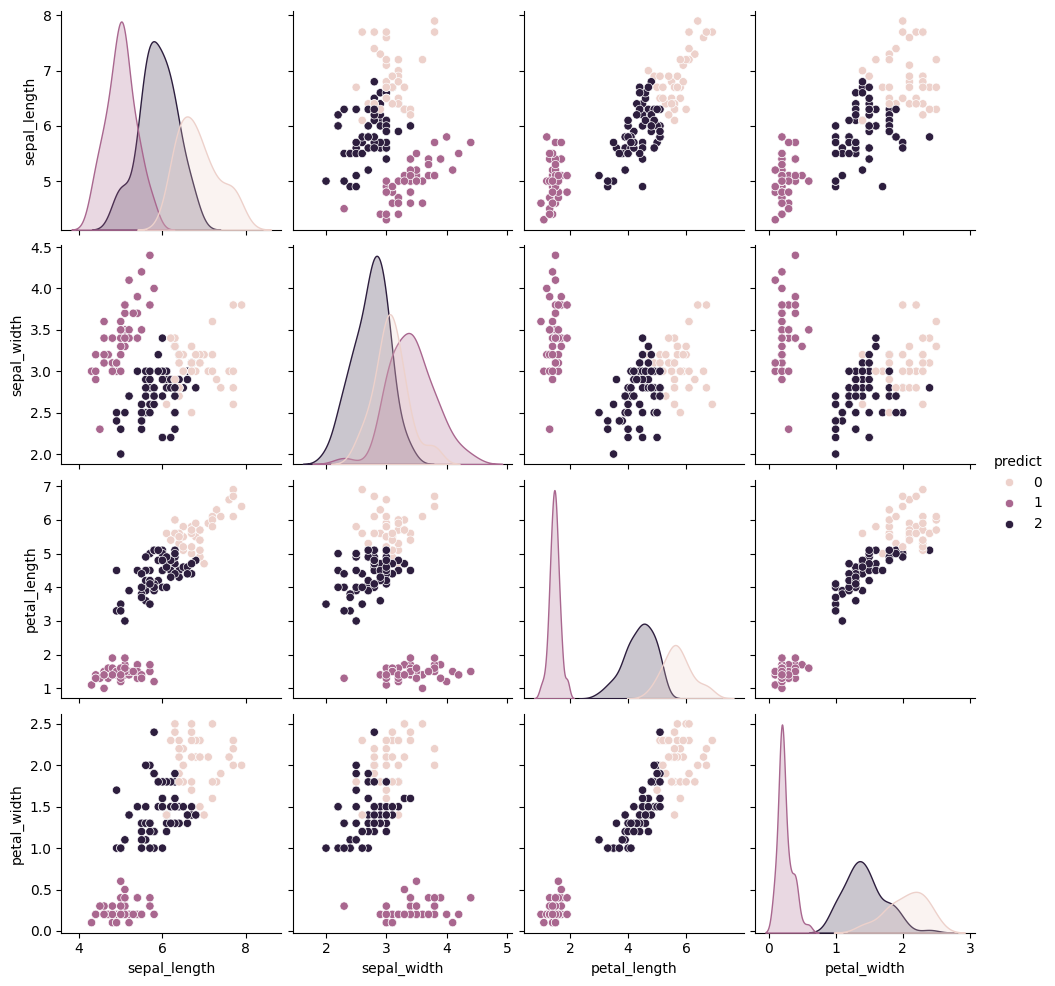

In [12]:
sns.pairplot(data= ds, hue= 'predict')
plt.show()

In [20]:
ss = []
no_c = [j for j in range(2, 21)]
for i in range(2, 21):
    km1 = KMeans(n_clusters=i)
    km1.fit(ds)
    silhouette_score(ds, km1.labels_)
    ss.append(silhouette_score(ds, km1.labels_))

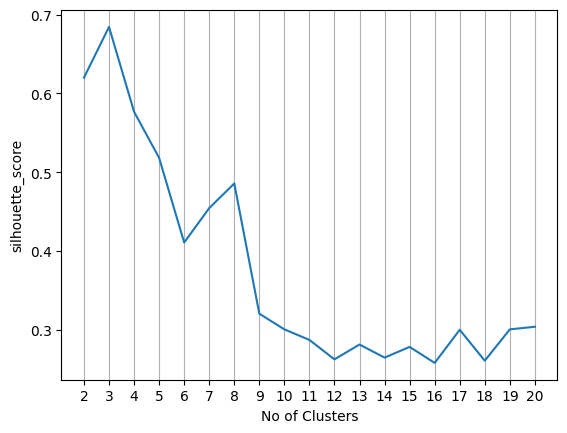

In [ ]:
plt.plot(no_c, ss)
plt.xlabel('No of Clusters')
plt.ylabel("silhouette_score")
plt.xticks(no_c)
plt.grid(axis='x')
plt.show() # here the best value is at 3 which is the highesh